In [1]:
import sys
sys.path.append('/home/nvaytet/work/code/sciview/src')
import sciview as sv
import numpy as np

In [2]:
x = np.arange(4)
y = np.arange(2)
z = np.random.random([4, 2])
sv.plot_2d(x, y, z)

(32, 3)
(16, 3)
(32, 3)
float32
uint32
float32
vertices
[[-0.5 -0.5  0. ]
 [ 0.5 -0.5  0. ]
 [ 0.5 -0.5  0. ]
 [ 1.5 -0.5  0. ]
 [ 1.5 -0.5  0. ]
 [ 2.5 -0.5  0. ]
 [ 2.5 -0.5  0. ]
 [ 3.5 -0.5  0. ]
 [-0.5  0.5  0. ]
 [ 0.5  0.5  0. ]
 [ 0.5  0.5  0. ]
 [ 1.5  0.5  0. ]
 [ 1.5  0.5  0. ]
 [ 2.5  0.5  0. ]
 [ 2.5  0.5  0. ]
 [ 3.5  0.5  0. ]
 [-0.5  0.5  0. ]
 [ 0.5  0.5  0. ]
 [ 0.5  0.5  0. ]
 [ 1.5  0.5  0. ]
 [ 1.5  0.5  0. ]
 [ 2.5  0.5  0. ]
 [ 2.5  0.5  0. ]
 [ 3.5  0.5  0. ]
 [-0.5  1.5  0. ]
 [ 0.5  1.5  0. ]
 [ 0.5  1.5  0. ]
 [ 1.5  1.5  0. ]
 [ 1.5  1.5  0. ]
 [ 2.5  1.5  0. ]
 [ 2.5  1.5  0. ]
 [ 3.5  1.5  0. ]]
faces
[[ 0  1  8]
 [ 1  9  8]
 [ 2  3 10]
 [ 3 11 10]
 [ 4  5 12]
 [ 5 13 12]
 [ 6  7 14]
 [ 7 15 14]
 [16 17 24]
 [17 25 24]
 [18 19 26]
 [19 27 26]
 [20 21 28]
 [21 29 28]
 [22 23 30]
 [23 31 30]]
colors
[[0.267004 0.004874 0.329415]
 [0.267004 0.004874 0.329415]
 [0.267004 0.004874 0.329415]
 [0.267004 0.004874 0.329415]
 [0.185556 0.41857  0.556753]
 [0.185556 

Renderer(camera=PerspectiveCamera(aspect=1.6, position=(0.0, 0.0, 10.0), quaternion=(0.0, 0.0, 0.0, 1.0), scal…

In [5]:
import pythreejs as p3
geom = p3.CylinderGeometry(
    radiusTop=1,
    radiusBottom=1,
    height=1,
    radialSegments=10,
    heightSegments=1,
    openEnded=False,
    thetaStart=0,
    thetaLength=2.0*np.pi)
geom

Preview(child=CylinderGeometry(radialSegments=10), shadowMap=WebGLShadowMap())

In [2]:
import numpy as np
N = 100
M = 50
xx = np.arange(N, dtype=np.float64)
yy = np.arange(M, dtype=np.float64)
x, y = np.meshgrid(xx, yy)
b = N/20.0
c = M/2.0
r = np.sqrt(((x-c)/b)**2 + (y/b)**2)
a = np.sin(r)
a.shape

(50, 100)

In [139]:
sv.plot_2d(xx, yy, a)

Renderer(camera=OrthographicCamera(bottom=500.0, far=400.0, near=-400.0, quaternion=(0.0, 0.0, 0.0, 1.0), righ…

In [3]:
import pythreejs as p3

In [115]:
p3.WireframeGeometry(p3.ParametricGeometry(
    func="""function(u,v,out) {
        var x = 5 * (0.5 - u);
        var y = 5 * (0.5 - v);
        out.set(10 * x, 10 * y, x*x - y*y);
    }""",
    slices=30,
    stacks=20, _flat=True))

Preview(child=WireframeGeometry(geometry=ParametricGeometry(func='function(u,v,out) {\n        var x = 5 * (0.…

In [116]:
func = "function(u,v,out) {{ out.set({} * u, {} * v, 0);}}".format(N, M)
func

'function(u,v,out) { out.set(100 * u, 50 * v, 0);}'

In [170]:
N = 100
M = 50
xx = np.arange(N, dtype=np.float32)
yy = np.arange(M, dtype=np.float32)
x, y = np.meshgrid(xx, yy,indexing="ij")
# y, x = np.meshgrid(yy, xx)
b = N/20.0
c = M/2.0
r = np.sqrt(((x-c)/b)**2 + (y/b)**2)
a = np.sin(r)
a.shape

(100, 50)

In [180]:
grid = p3.PlaneBufferGeometry(
    width=N,
    height=M,
    widthSegments=1,
    heightSegments=1)

In [230]:
from matplotlib import cm
scalar_map = cm.ScalarMappable(cmap='viridis')
colors = scalar_map.to_rgba(a).astype(np.float32)
texture = p3.DataTexture(data=colors,
                         format="RGBAFormat",
                         type="FloatType", flipY=True)
#                          rotation=0.5*np.pi)

In [203]:
width=600
height=400
# grid = p3.GridHelper(size=10, divisions=10, colorCenterLine="#444444", colorGrid="#888888")

# surf = p3.Mesh(geometry=grid,
#                 material=p3.MeshBasicMaterial(map=p3.height_texture(a, 'viridis', rotation=90)))
surf = p3.Mesh(geometry=grid,
                material=p3.MeshBasicMaterial(map=texture))

# surf = p3.GridHelper(size=N, divisions=N, colorCenterLine="#444444",
#                      colorGrid="#888888", map=p3.height_texture(a, 'viridis'))

camera = p3.PerspectiveCamera(position=[0, 0, 100],
                              aspect=width / height)
scene = p3.Scene(children=[surf, camera])
controller = p3.OrbitControls(controlling=camera)
renderer = p3.Renderer(camera=camera, scene=scene,
                                 controls=[controller],
                                 width=width,
                                 height=height)
# p3.WireframeGeometry(p3.GridHelper(size=10, divisions=10, colorCenterLine="#444444", colorGrid="#888888"))
renderer

Renderer(camera=PerspectiveCamera(aspect=1.5, position=(0.0, 0.0, 100.0), quaternion=(0.0, 0.0, 0.0, 1.0), sca…

In [195]:
help(p3.height_texture)

Help on function height_texture in module pythreejs.pythreejs:

height_texture(z, colormap='viridis')
    Create a texture corresponding to the heights in z and the given colormap.



In [67]:
p3.PlaneBufferGeometry(
    width=100,
    height=15,
    widthSegments=1,
    heightSegments=1)

Preview(child=PlaneBufferGeometry(height=15.0, width=100.0), shadowMap=WebGLShadowMap())

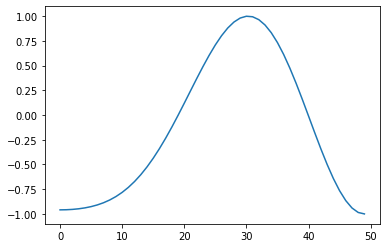

In [128]:
import matplotlib.pyplot as plt
plt.plot(a[0, :])
plt.show()

In [201]:
texture

Preview(child=DataTexture(data=array([[[0.273809, 0.031497, 0.358853, 1.      ],
        [0.267004, 0.004874, …

In [73]:
grid = p3.PlaneGeometry(
    width=N,
    height=M,
    widthSegments=N,
    heightSegments=M)
geom = p3.BufferGeometry.from_geometry(grid)

In [74]:
from matplotlib import cm
scalar_map = cm.ScalarMappable(cmap='viridis')
colors = scalar_map.to_rgba(a.flat).astype(np.float32)
# texture = p3.DataTexture(data=colors,
#                          format="RGBAFormat",
#                          type="FloatType", flipY=True)
# #                          rotation=0.5*np.pi)
# geom.attributes["color"] = p3.BufferAttribute(array=np.repeat(colors[:, :3], 6, axis=0))
geom.attributes["color"] = p3.BufferAttribute(array=np.random.random([30000, 3]))

In [75]:
grid

Preview(child=PlaneGeometry(height=50.0, heightSegments=50, width=100.0, widthSegments=100), shadowMap=WebGLSh…

In [76]:
# material=p3.MeshBasicMaterial(vertexColors='VertexColors')

In [77]:
# surf = p3.Mesh(geometry=geom,
#                 material=p3.MeshBasicMaterial(vertexColors='VertexColors'))
surf = p3.Mesh(geometry=geom,
                material=material)

In [78]:
width=600
height=400
camera = p3.PerspectiveCamera(position=[0, 0, 100],
                              aspect=width / height)
key_light = p3.DirectionalLight(position=[0, 10, 10])
ambient_light = p3.AmbientLight()
scene = p3.Scene(children=[surf, camera, key_light, ambient_light], background="red")
controller = p3.OrbitControls(controlling=camera)
renderer = p3.Renderer(camera=camera, scene=scene,
                                 controls=[controller],
                                 width=width,
                                 height=height)
renderer

Renderer(camera=PerspectiveCamera(aspect=1.5, position=(0.0, 0.0, 100.0), quaternion=(0.0, 0.0, 0.0, 1.0), sca…

In [83]:
geom.attributes["uv"].array[:100]

array([[0.  , 1.  ],
       [0.  , 0.98],
       [0.01, 1.  ],
       [0.  , 0.98],
       [0.01, 0.98],
       [0.01, 1.  ],
       [0.01, 1.  ],
       [0.01, 0.98],
       [0.02, 1.  ],
       [0.01, 0.98],
       [0.02, 0.98],
       [0.02, 1.  ],
       [0.02, 1.  ],
       [0.02, 0.98],
       [0.03, 1.  ],
       [0.02, 0.98],
       [0.03, 0.98],
       [0.03, 1.  ],
       [0.03, 1.  ],
       [0.03, 0.98],
       [0.04, 1.  ],
       [0.03, 0.98],
       [0.04, 0.98],
       [0.04, 1.  ],
       [0.04, 1.  ],
       [0.04, 0.98],
       [0.05, 1.  ],
       [0.04, 0.98],
       [0.05, 0.98],
       [0.05, 1.  ],
       [0.05, 1.  ],
       [0.05, 0.98],
       [0.06, 1.  ],
       [0.05, 0.98],
       [0.06, 0.98],
       [0.06, 1.  ],
       [0.06, 1.  ],
       [0.06, 0.98],
       [0.07, 1.  ],
       [0.06, 0.98],
       [0.07, 0.98],
       [0.07, 1.  ],
       [0.07, 1.  ],
       [0.07, 0.98],
       [0.08, 1.  ],
       [0.07, 0.98],
       [0.08, 0.98],
       [0.08,

In [70]:
material = p3.ShaderMaterial(
    vertexShader='''
precision highp float;
varying vec4 vColor;
varying vec3 vPosition;
void main() {
    vPosition = position;
    vColor = vec4( color, 1.0);
    gl_Position = projectionMatrix * modelViewMatrix * vec4( vPosition, 1.0 );
}
''',
    fragmentShader='''
precision highp float;
varying vec4 vColor;
void main() {
    gl_FragColor = vec4( vColor );
}
}
''',
    vertexColors='VertexColors'
)

In [37]:
colors.shape

(5000, 4)

In [38]:
colors

array([[0.273809, 0.031497, 0.358853, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       [0.267004, 0.004874, 0.329415, 1.      ],
       ...,
       [0.26851 , 0.009605, 0.335427, 1.      ],
       [0.273809, 0.031497, 0.358853, 1.      ],
       [0.280894, 0.078907, 0.402329, 1.      ]], dtype=float32)

In [42]:
np.repeat(colors[:, :3], 6, axis=0)[:20]

array([[0.273809, 0.031497, 0.358853],
       [0.273809, 0.031497, 0.358853],
       [0.273809, 0.031497, 0.358853],
       [0.273809, 0.031497, 0.358853],
       [0.273809, 0.031497, 0.358853],
       [0.273809, 0.031497, 0.358853],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.274952, 0.037752, 0.364543],
       [0.274952, 0.037752, 0.364543]], dtype=float32)

In [40]:
50*100*2

10000

In [55]:
50*100*18

90000

In [56]:
30000*3

90000